## EDA Project AMCAT Data Analysis 

***The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO). The study is primarily limited  only to students with engineering disciplines.***


***The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills.*** 


***The dataset also contains demographic features. The dataset  contains  around  40 independent variables and 4000 data points. The independent variables are both continuous and categorical in nature. The dataset contains a unique identifier for each candidate. Below mentioned table contains the details for the original dataset.***

| VARIABLES | TYPE | Description |
| --- | --- | --- |
| ID | UID | A unique ID to identify a candidate |
| Salary | Continuous | Annual CTC oﬀered to the candidate (in INR) |
| DOJ | Date | Date of joining the company |
| DOL | Date | Date of leaving the company |
| Designation | Categorical | Designation oﬀered in the job |
| JobCity | Categorical | Location of the job (city) |
| Gender | Categorical | Candidate’s gender |
| DOB | Date | Date of birth of candidate |
| 10percentage | Continuous | Overall marks obtained in grade 10 examinations |
| 10board | Continuous | The school board whose curriculum the candidate followed in grade 10 |
| 12graduation | Date | Year of graduation - senior year high school |
| 12percentage | Continuous | Overall marks obtained in grade 12 examinations |
| 12board | Date | The school board whose curriculum the candidate followed in grade 12 |
| CollegeID | NA/ID | Unique ID identifying the college which the candidate attended |
| CollegeTier | Categorical | Tier of college |
| Degree | Categorical | Degree obtained/pursued by the candidate |
| Specialization | Categorical | Specialization pursued by the candidate |
| CollegeGPA | Continuous | Aggregate GPA at graduation |
| CollegeCityID | NA/ID | A unique ID to identify the city in which the college is located in |
| CollegeCityTier | Categorical | The tier of the city in which the college is located |
| CollegeState | Categorical | Name of States |
| GraduationYear | Date | Year of graduation (Bachelor’s degree) |
| English | Continuous | Scores in AMCAT English section |
| Logical | Continuous | Scores in AMCAT Logical section |
| Quant | Continuous | Scores in AMCAT Quantitative section |
| Domain | Continuous/ Standardized | Scores in AMCAT’s domain module |
| ComputerProgramming | Continuous | Score in AMCAT’s Computer programming section |
| ElectronicsAndSemicon | Continuous | Score in AMCAT’s Electronics & Semiconductor Engineering section |
| ComputerScience | Continuous | Score in AMCAT’s Computer Science section |
| MechanicalEngg | Continuous | Score in AMCAT’s Mechanical Engineering section |
| ElectricalEngg | Continuous | Score in AMCAT’s Electrical Engineering section |
| TelecomEngg | Continuous | Score in AMCAT’s Telecommunication Engineering section |
| CivilEngg | Continuous | Score in AMCAT’s Civil Engineering section |
| conscientiousness | Continuous/ Standardized | Scores in one of the sections of AMCAT’s personality test |
| agreeableness | Continuous/ Standardized | Scores in one of the sections of AMCAT’s personality test |
| extraversion | Continuous/ Standardized | Scores in one of the sections of AMCAT’s personality test |
| neuroticism | Continuous/ Standardized | Scores in one of the sections of AMCAT’s personality test |
| openess_to_experience | Continuous/ Standardized | Scores in one of the sections of AMCAT’s personality test |


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import scipy
from scipy import stats 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel(r"C:\Users\Rusum Lucky\Downloads\data.xlsx")

In [3]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [4]:
df.shape

(3998, 39)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [6]:
df.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


In [7]:
numerical_df=df.select_dtypes(["int64","float64"])

In [8]:
numerical_df.head()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,84.3,2007,95.8,1141,2,78.00,1141,0,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,85.4,2007,85.0,5807,2,70.06,5807,0,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,85.0,2010,68.2,64,2,70.00,64,0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,85.6,2007,83.6,6920,1,74.64,6920,1,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,78.0,2008,76.8,11368,2,73.90,11368,0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [9]:
numerical_df.shape

(3998, 27)

In [10]:
cat_df=df.select_dtypes("object")

In [11]:
cat_df.head()

,Unnamed: 0,DOL,Designation,JobCity,Gender,10board,12board,Degree,Specialization,CollegeState
0,train,present,senior quality engineer,Bangalore,f,"board ofsecondary education,ap","board of intermediate education,ap",B.Tech/B.E.,computer engineering,Andhra Pradesh
1,train,present,assistant manager,Indore,m,cbse,cbse,B.Tech/B.E.,electronics and communication engineering,Madhya Pradesh
2,train,present,systems engineer,Chennai,f,cbse,cbse,B.Tech/B.E.,information technology,Uttar Pradesh
3,train,present,senior software engineer,Gurgaon,m,cbse,cbse,B.Tech/B.E.,computer engineering,Delhi
4,train,2015-03-01 00:00:00,get,Manesar,m,cbse,cbse,B.Tech/B.E.,electronics and communication engineering,Uttar Pradesh


In [12]:
cat_df.shape

(3998, 10)

In [13]:
numerical_df.isna().sum()

ID                       0
Salary                   0
10percentage             0
12graduation             0
12percentage             0
CollegeID                0
CollegeTier              0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
dtype: int64

In [14]:
cat_df.isna().sum()

Unnamed: 0        0
DOL               0
Designation       0
JobCity           0
Gender            0
10board           0
12board           0
Degree            0
Specialization    0
CollegeState      0
dtype: int64

In [15]:
cat_df.drop("Unnamed: 0",axis=1,inplace=True)

In [16]:
df.drop("Unnamed: 0",axis=1,inplace=True)

## Univariate Analysis

## Numerical Feature 

In [17]:
numerical_df.columns

Index(['ID', 'Salary', '10percentage', '12graduation', '12percentage',
       'CollegeID', 'CollegeTier', 'collegeGPA', 'CollegeCityID',
       'CollegeCityTier', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

### Salary Column

<Axes: >

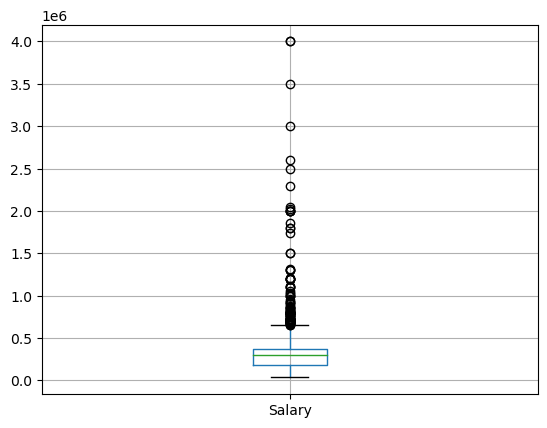

In [18]:
numerical_df.boxplot(column="Salary")

####  As we can see there are several outliers in the salary column which is not good for our analysis, we have to deal with it 

In [19]:
print("Mean:", numerical_df.Salary.mean())
print("Median:", numerical_df.Salary.median())
print("Mode:", numerical_df.Salary.mode()[0])
print("Std:", numerical_df.Salary.std())
print("Min:", numerical_df.Salary.min())
print("Max:", numerical_df.Salary.max())

Mean: 307699.8499249625
Median: 300000.0
Mode: 300000
Std: 212737.4999568574
Min: 35000
Max: 4000000


#### Average Salary is 307700. Minimum- 35000 and Maximum salary is 4000000

In [20]:
numerical_df["Salary"].describe()

count    3.998000e+03
mean     3.076998e+05
std      2.127375e+05
min      3.500000e+04
25%      1.800000e+05
50%      3.000000e+05
75%      3.700000e+05
max      4.000000e+06
Name: Salary, dtype: float64

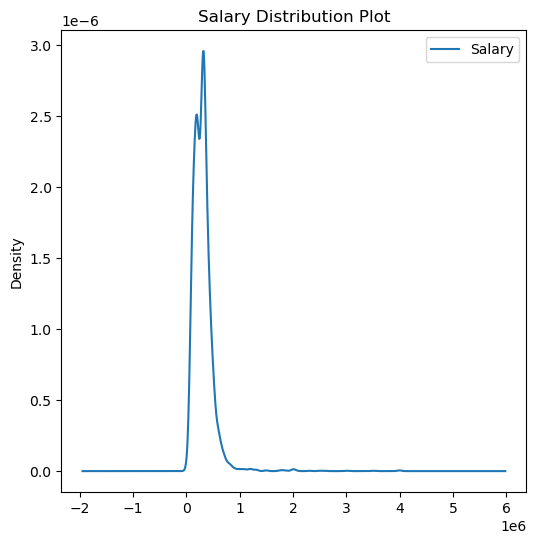

In [21]:
# Visualizing Salary columns Distribution

fig,ax=plt.subplots()
numerical_df.Salary.plot(kind='kde',title='Salary Distribution Plot', figsize= (6,6), legend=True , ax=ax )
plt.show()

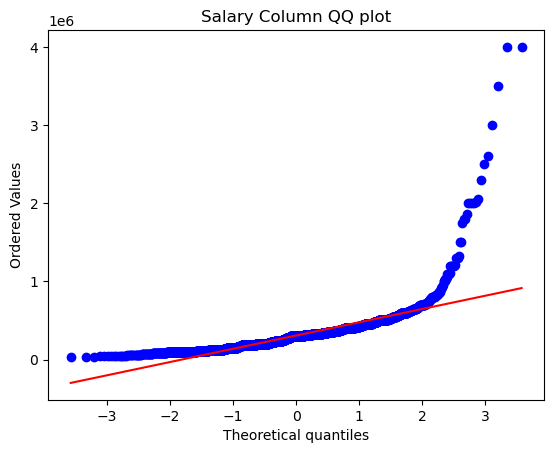

In [22]:
# Create QQ plot
fig, ax = plt.subplots()
stats.probplot(numerical_df["Salary"], plot=ax)

# Set plot labels
ax.set_title("Salary Column QQ plot")
plt.show()

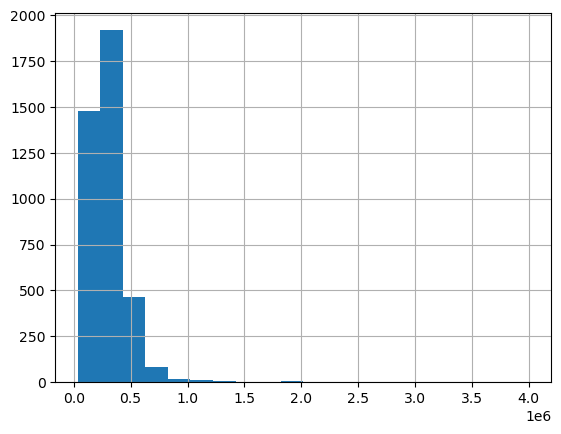

In [23]:
numerical_df.Salary.hist(bins=20)
plt.show()

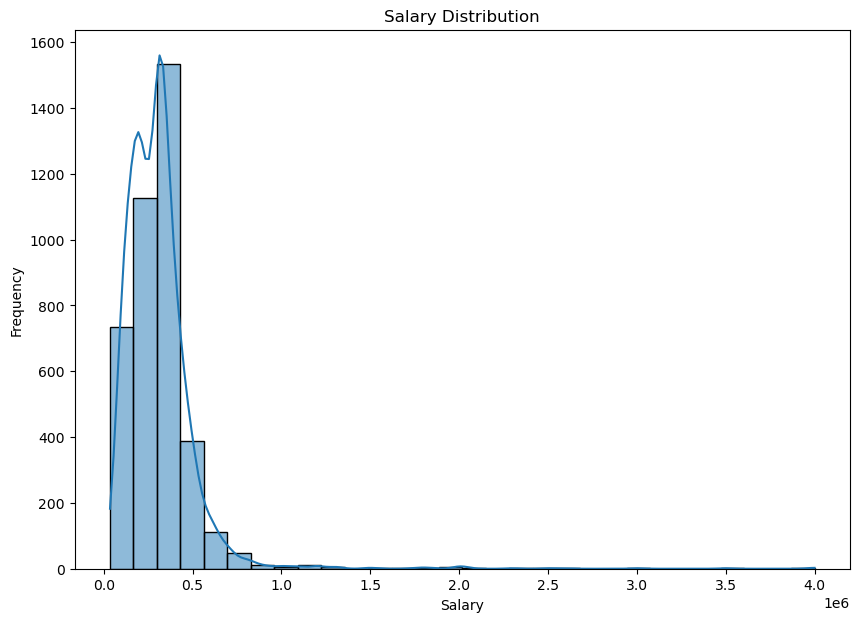

In [24]:
plt.figure(figsize=(10, 7))
sns.histplot(numerical_df['Salary'], bins=30, kde=True)
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Salary Distribution')
plt.show()

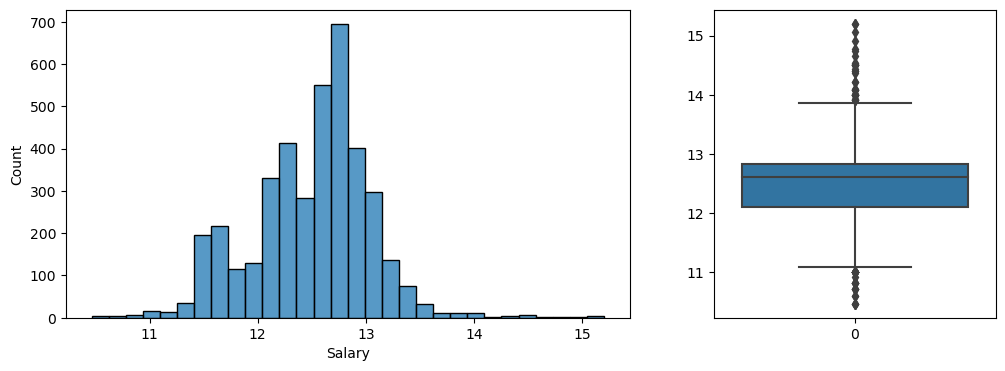

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, width_ratios=[2, 1], figsize=(12,4)) 
sns.histplot(np.log(numerical_df['Salary']), ax=ax1, bins=30) 
sns.boxplot(np.log(numerical_df['Salary']), ax=ax2) 
plt.show()

### 10percentage, 12percentage and collegeGPA

,10percentage,12percentage,collegeGPA
count,3998.00,3998.00,3998.00
mean,77.93,74.47,71.49
std,9.85,11.00,8.17
min,43.00,40.00,6.45
25%,71.68,66.00,66.41
50%,79.15,74.40,71.72
75%,85.67,82.60,76.33
max,97.76,98.70,99.93


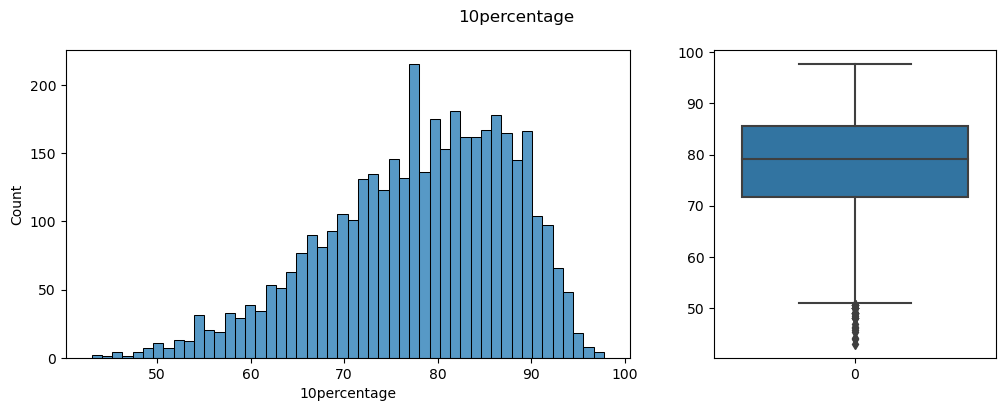

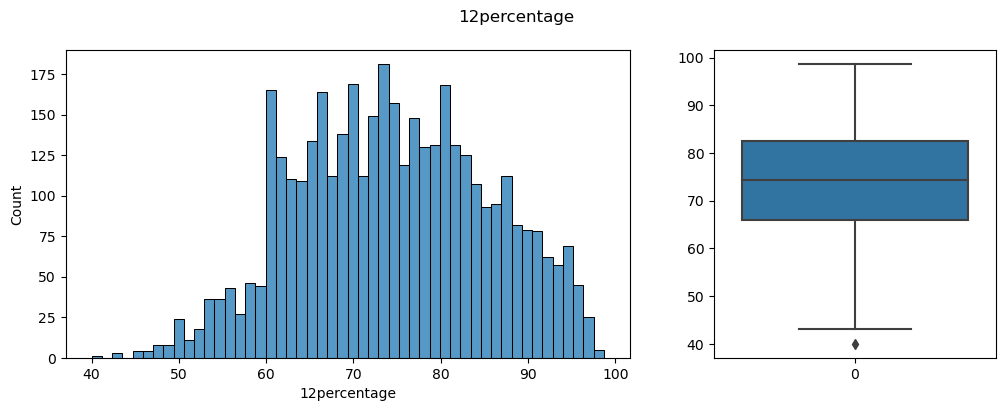

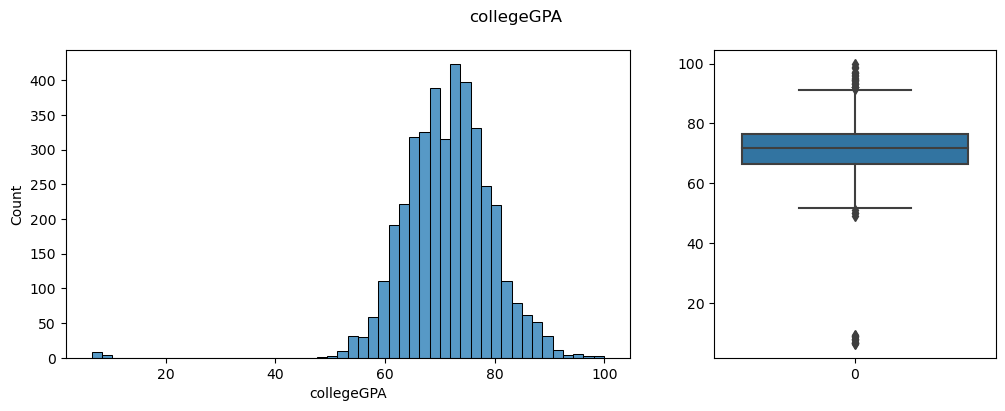

In [26]:
display(numerical_df[['10percentage', '12percentage', 'collegeGPA']].describe().round(2)) 
for col in ['10percentage', '12percentage', 'collegeGPA']: 
    fig, (ax1, ax2) = plt.subplots(1, 2, width_ratios=[2, 1], figsize=(12,4)) 
    sns.histplot(numerical_df[col], ax=ax1, bins=50) 
    sns.boxplot(numerical_df[col], ax=ax2) 
    plt.suptitle(col) 
    plt.show()

#### The column  collegeGPA contains outliers. Values less than 20 are markedly different from the other points. It consists of extreme outliers

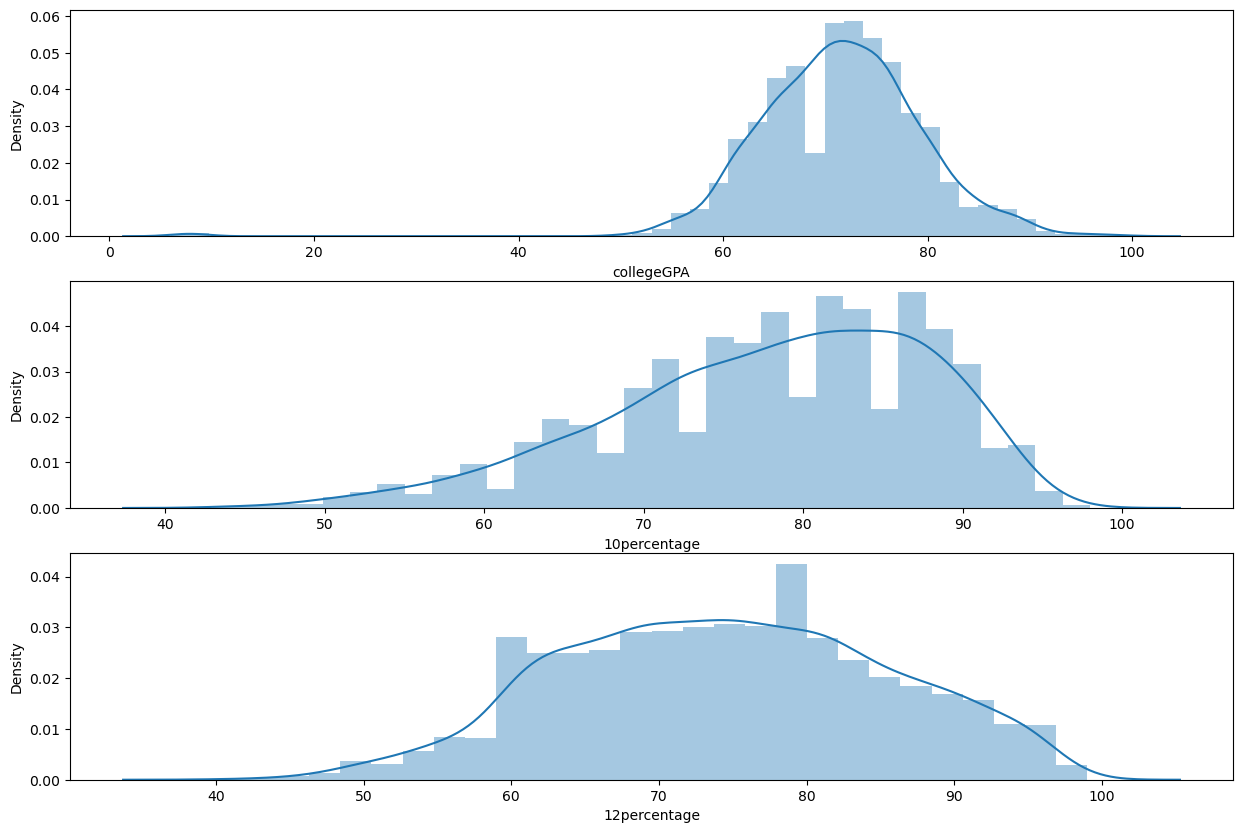

In [27]:
fig, axs = plt.subplots(3 , figsize=(15, 10))

sns.distplot(numerical_df['collegeGPA'].round(0) ,ax=axs[0])
sns.distplot(numerical_df['10percentage'].round(0) ,ax=axs[1])
sns.distplot(numerical_df['12percentage'].round(0) , ax=axs[2]);
plt.show()

* Most of the collegeGPA is concentrated in between 60 to 80
* In 10 percentage we can see a continuous rise in until 90 , there is a sudden increase at 60 percent in 12 class
* Most the students tend to get around 70 to 80 percent of marks during their school and college life.

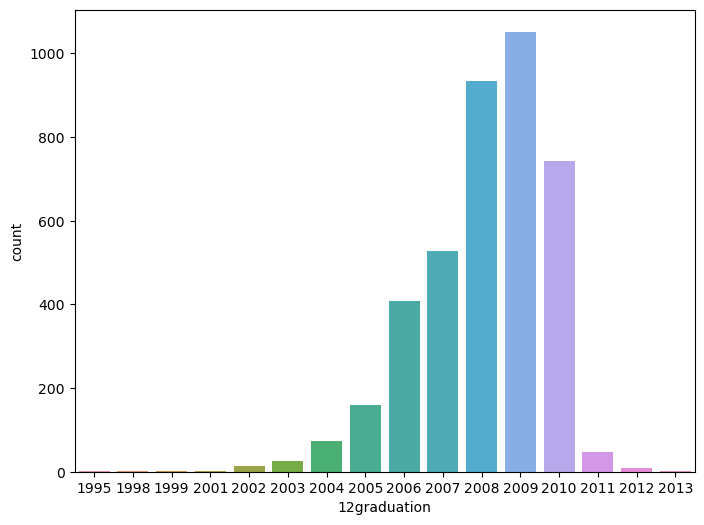

In [28]:
plt.figure(figsize=(8, 6))
sns.countplot(x='12graduation', data=numerical_df)
plt.show()

#### In 2009 students who completed 12th graduation are more as compared to other years.

### College Tier

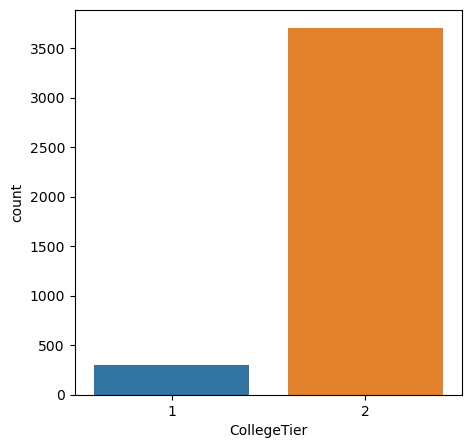

In [29]:
plt.figure(figsize=(5, 5))
sns.countplot(x='CollegeTier', data=numerical_df)
plt.show()

#### Maximum students are of tier 2 college 

### Age

In [30]:
df['DOB'] = pd.to_datetime(df['DOB'])

In [31]:
df['Age'] = 2015 - df['DOB'].dt.year 

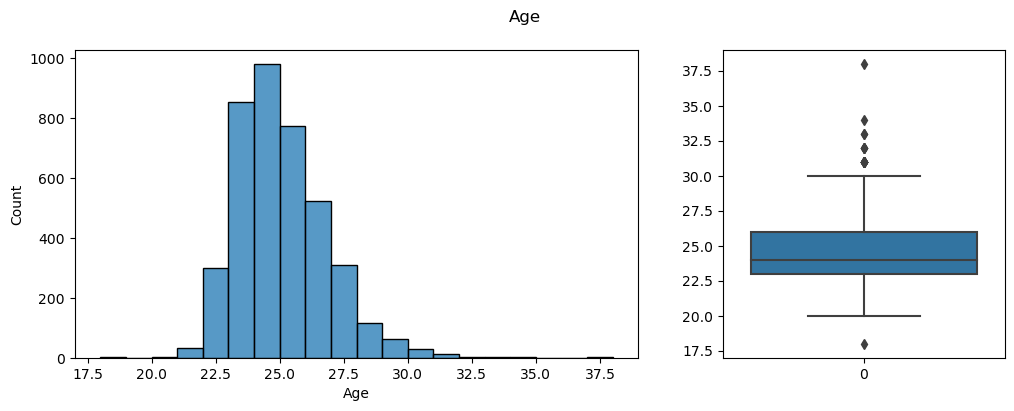

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2, width_ratios=[2, 1], figsize=(12,4)) 
sns.histplot(df['Age'], ax=ax1, bins=20) 
sns.boxplot(df['Age'], ax=ax2) 
plt.suptitle('Age') 
plt.show()


In [33]:
df["Age"].describe()

count    3998.000000
mean       24.572536
std         1.767473
min        18.000000
25%        23.000000
50%        24.000000
75%        26.000000
max        38.000000
Name: Age, dtype: float64

* Mean age of the people are 24years 
* From the above points i.e. 75 percent of the people are of 26 years old means they are young and ,ostly must be in college or company.
* Max age of person is 38years.

### AMCAT Scores

In [34]:
scores = ['English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg'] 
standard_scores = ['conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience'] 

In [35]:
df[scores].describe()

,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg
count,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,501.649075,501.598799,513.378189,0.510490,353.102801,95.328414,90.742371,22.974737,16.478739,31.851176,2.683842
std,104.940021,86.783297,122.302332,0.468671,205.355519,158.241218,175.273083,98.123311,87.585634,104.852845,36.658505
min,180.000000,195.000000,120.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,425.000000,445.000000,430.000000,0.342315,295.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,500.000000,505.000000,515.000000,0.622643,415.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
75%,570.000000,565.000000,595.000000,0.842248,495.000000,233.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
max,875.000000,795.000000,900.000000,0.999910,840.000000,612.000000,715.000000,623.000000,676.000000,548.000000,516.000000


* The value "-1" in some of the columns that represent scores could indicate missing values, so it should be replaced with NaN.

In [36]:
df[scores] = df[scores].replace(-1, np.nan)

In [37]:
df[standard_scores].describe()

,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,1.028666,0.941782,0.951471,1.007580,1.008075
min,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.995300,1.904800,2.535400,3.352500,1.822400


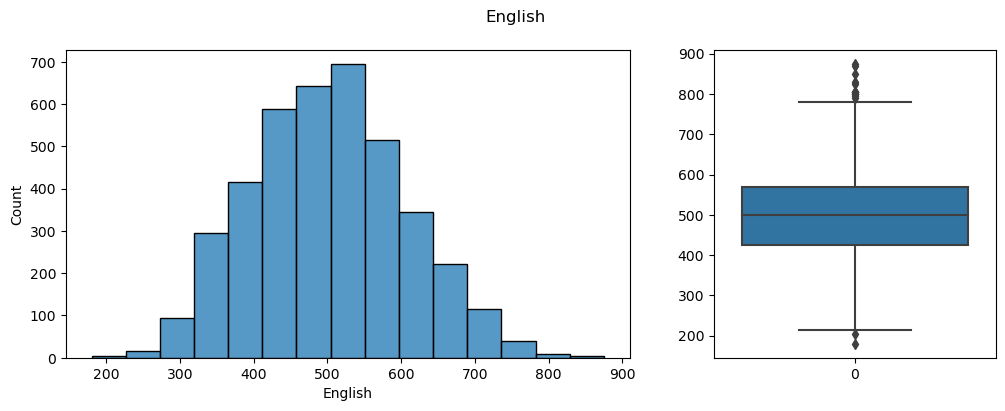

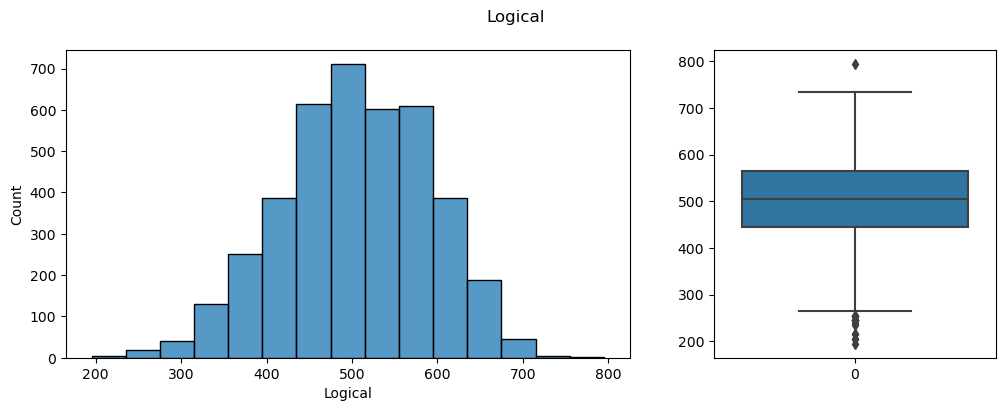

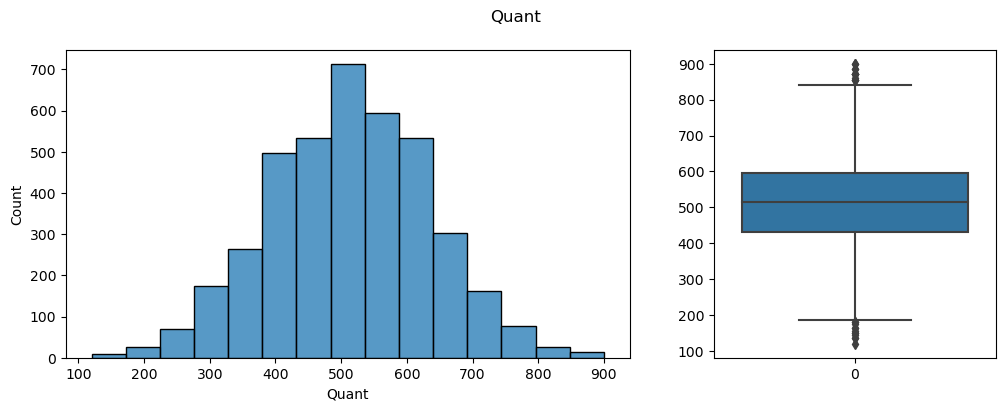

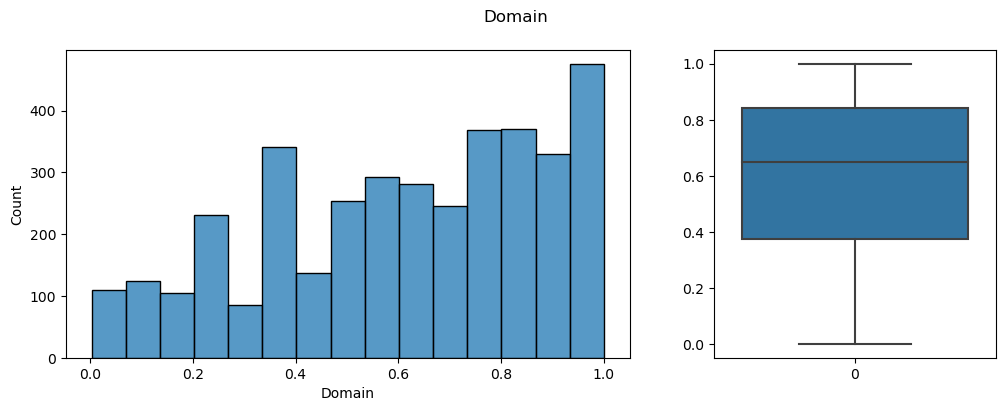

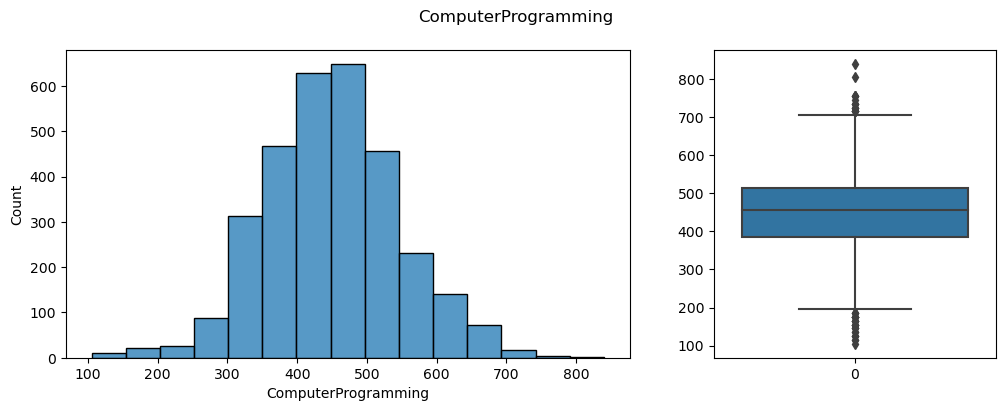

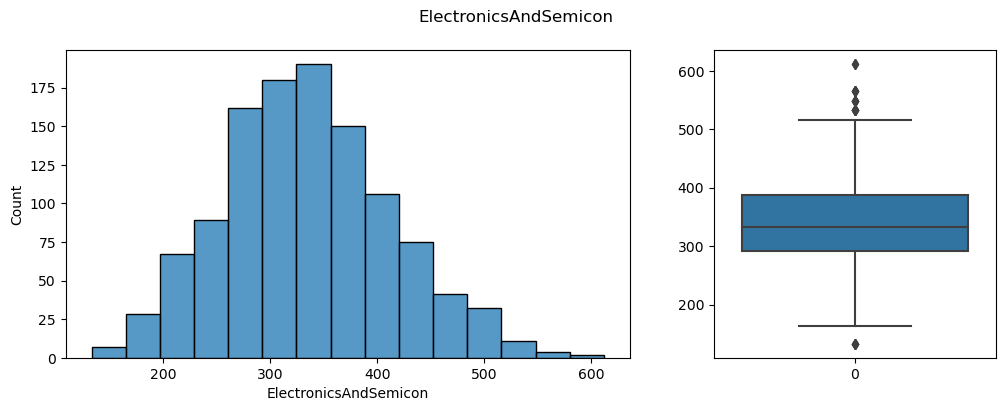

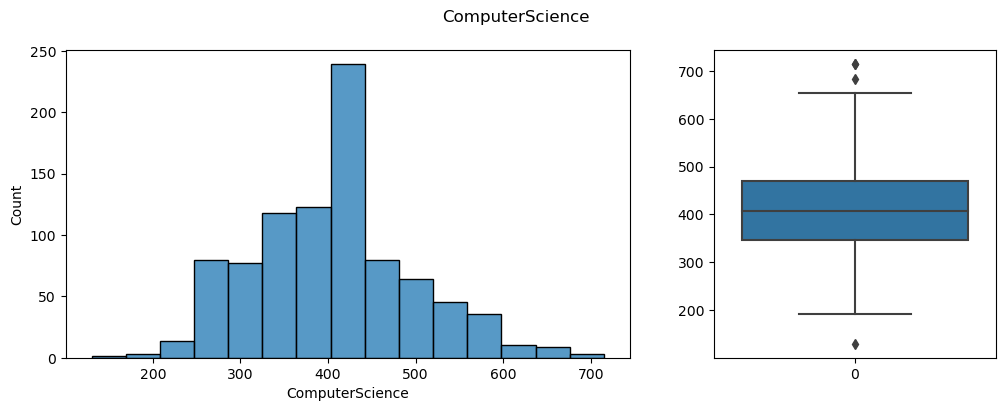

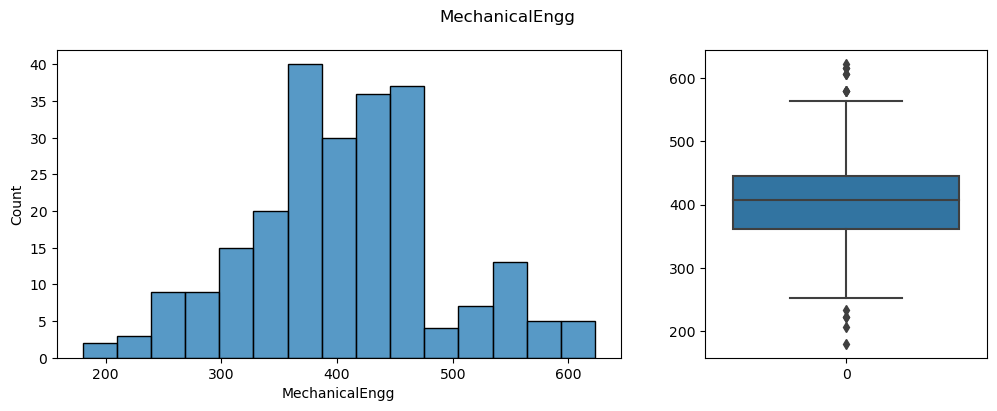

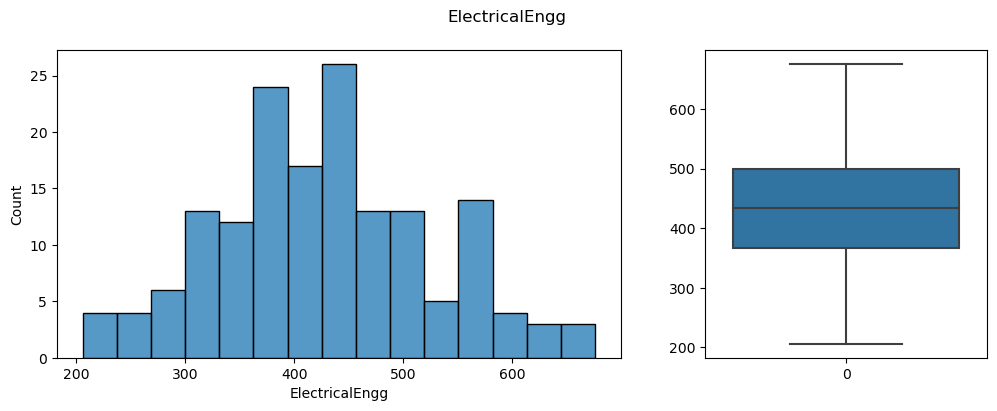

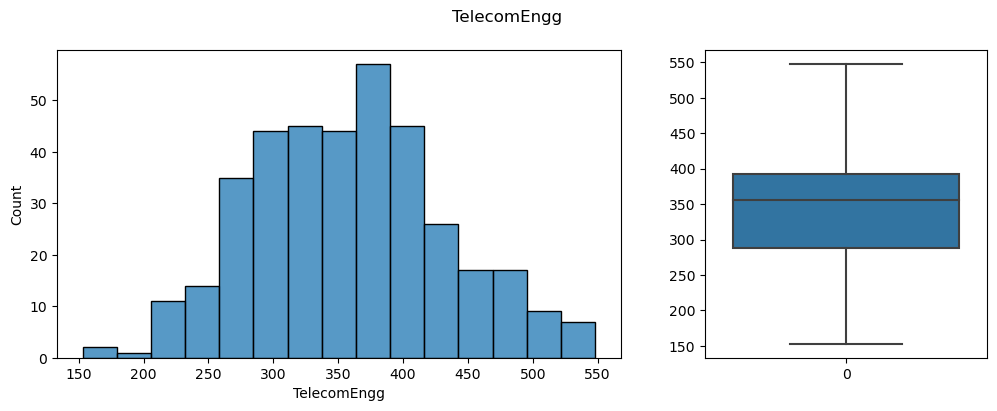

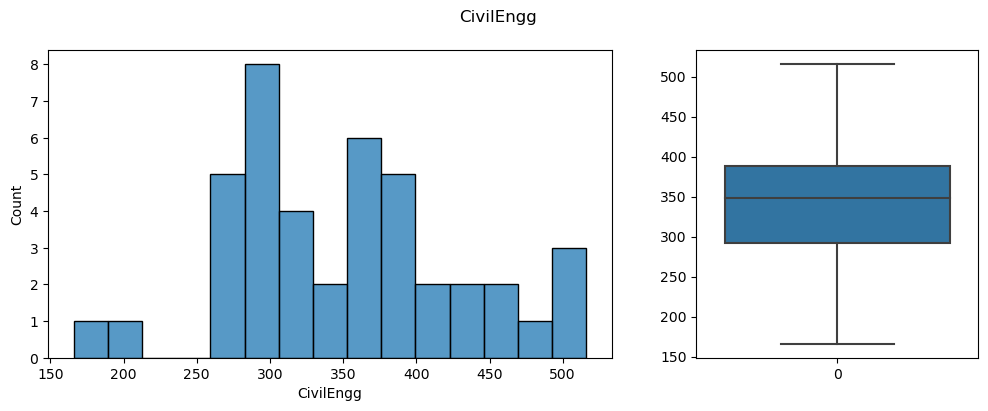

In [38]:
for col in scores: 
    fig, (ax1, ax2) = plt.subplots(1, 2, width_ratios=[2, 1], figsize=(12,4)) 
    sns.histplot(df[col], ax=ax1, bins=15) 
    sns.boxplot(df[col], ax=ax2) 
    plt.suptitle(col) 
    plt.show()

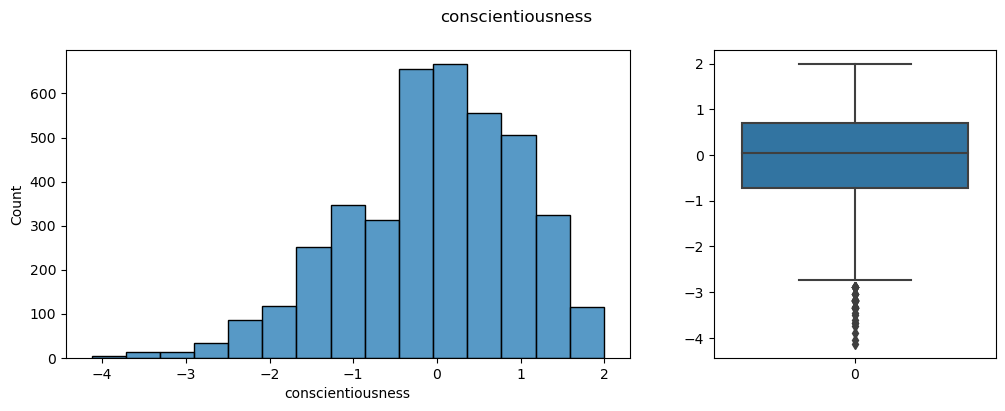

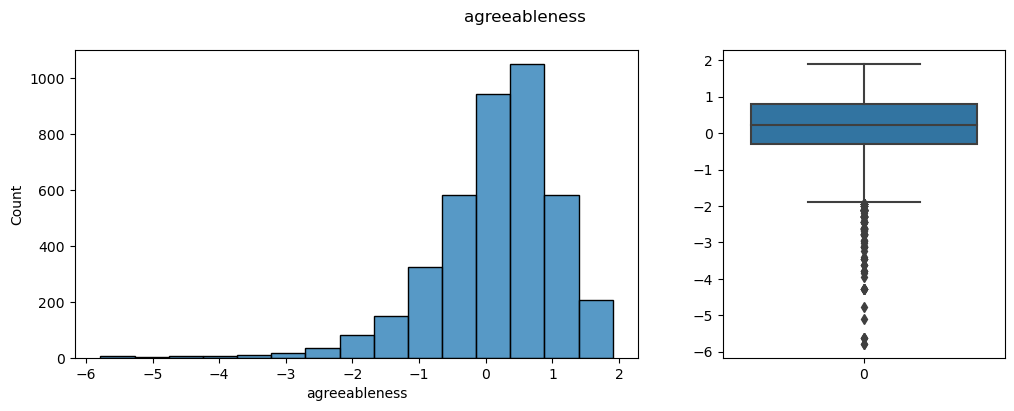

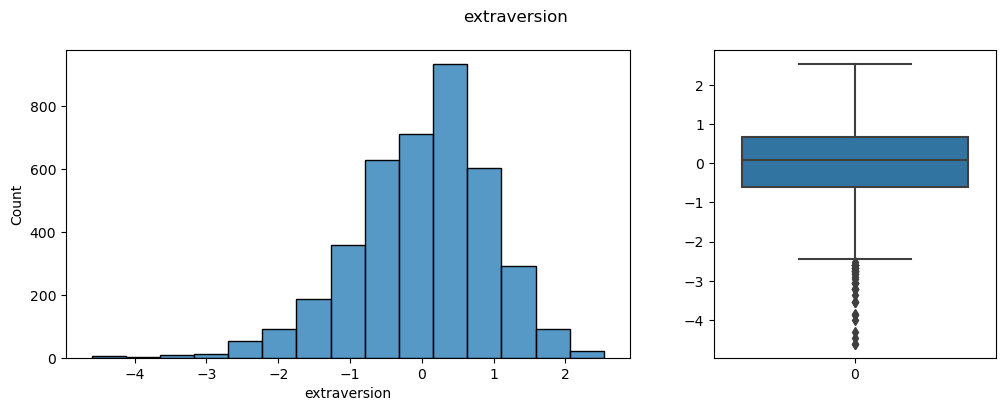

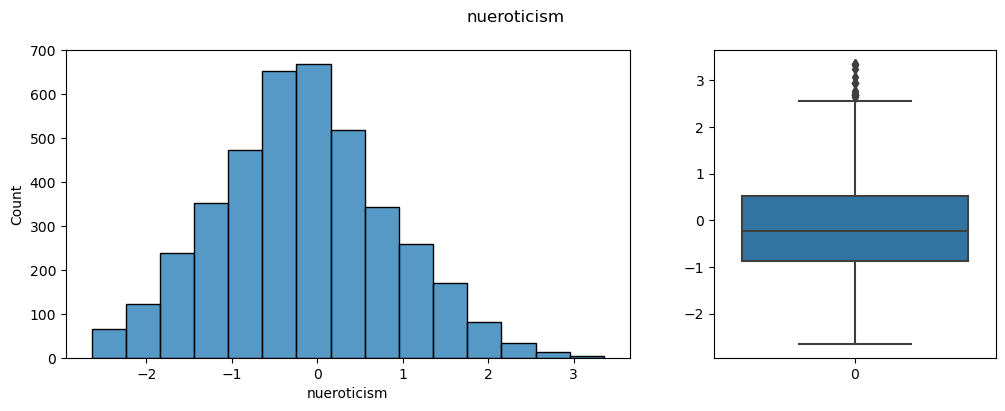

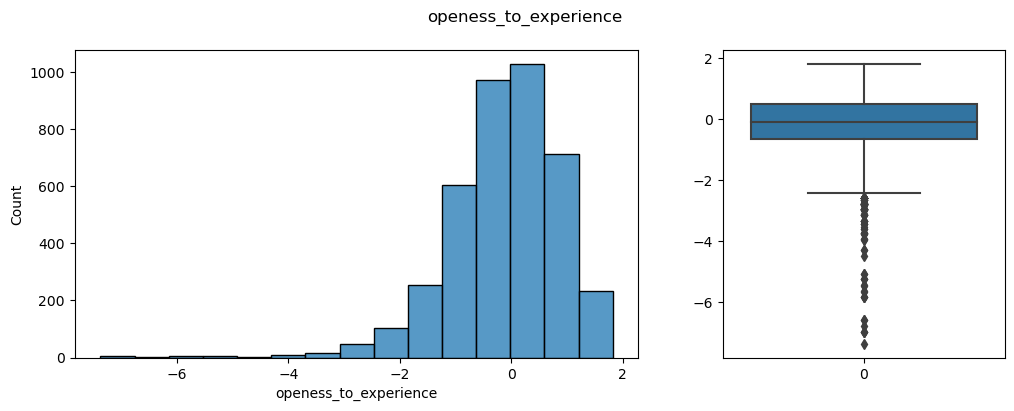

In [39]:
for col in standard_scores:
    fig, (ax1, ax2) = plt.subplots(1, 2, width_ratios=[2, 1], figsize=(12,4)) 
    sns.histplot(df[col], ax=ax1, bins=15) 
    sns.boxplot(df[col], ax=ax2) 
    plt.suptitle(col) 
    plt.show()

* Except for "Domain" scores, the distributions of unstandardized scores are more or less symmetric, with a few moderate outliers.

* Some distributions of standardized scores are skewed, with a lot of values less than three standard deviations from the mean.

### 12th Graduation

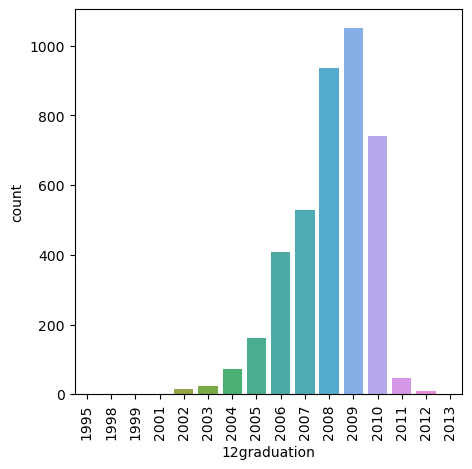

In [40]:
plt.figure(figsize=(5,5)) 
sns.countplot(data=df, x='12graduation') 
plt.xticks(rotation=90)
plt.show()

* Maximum students completed there 12th in 2009.

### Graduation Year

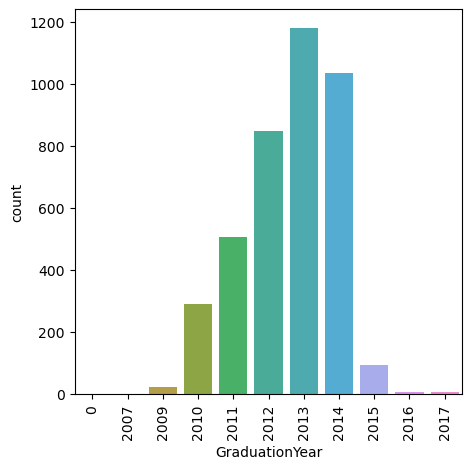

In [41]:
plt.figure(figsize=(5,5))
sns.countplot(data=df.dropna(subset='GraduationYear'), x='GraduationYear') 
plt.xticks(rotation=90)
plt.show()

* Maximum students are graduated completed bachelor's in 2013 

### DOJ, DOL and JobDuration

In [42]:
df["DOL"]

0                   present
1                   present
2                   present
3                   present
4       2015-03-01 00:00:00
               ...         
3993    2012-10-01 00:00:00
3994    2013-07-01 00:00:00
3995                present
3996    2015-01-01 00:00:00
3997                present
Name: DOL, Length: 3998, dtype: object

**The date when the employee left the company is listed in the "DOL" column**

* In this the present status shows that the employee is currently working but according to the dataset it is of 2015 so with respect to that the analysis of the data is done on 2015 so instead of taking the present date as working we can take the year's end date to be the last when he left the company (hypothetical)

In [43]:
df['DOL'] = df['DOL'].replace('present', '2015-12-31 00:00:00')
df['DOL'] = pd.to_datetime(df['DOL'])
    

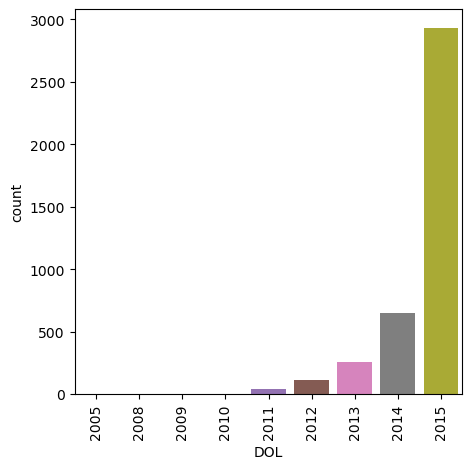

In [44]:
plt.figure(figsize=(5,5))
sns.countplot(x=df['DOL'].dt.year)
plt.xticks(rotation=90)
plt.show()

In [45]:
df["DOJ"]=pd.to_datetime(df["DOJ"])

In [46]:
df["DOJ"]

0      2012-06-01
1      2013-09-01
2      2014-06-01
3      2011-07-01
4      2014-03-01
          ...    
3993   2011-10-01
3994   2013-07-01
3995   2013-07-01
3996   2014-07-01
3997   2013-02-01
Name: DOJ, Length: 3998, dtype: datetime64[ns]

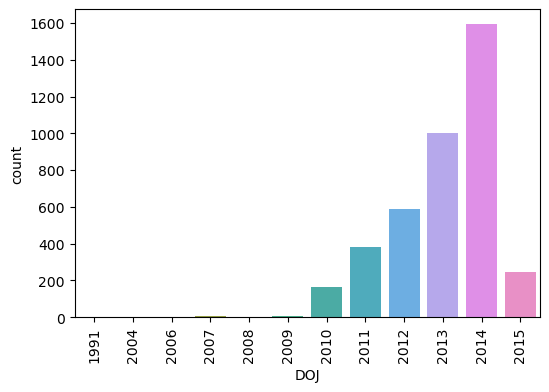

In [47]:
plt.figure(figsize=(6,4))
sns.countplot(x=df["DOJ"].dt.year)
plt.xticks(rotation=90)
plt.show()

In [48]:
df[['DOJ', 'DOL']].describe(datetime_is_numeric=True)

,DOJ,DOL
count,3998,3998
mean,2013-07-02 11:04:10.325162496,2015-03-24 05:46:51.205602816
min,1991-06-01 00:00:00,2005-03-01 00:00:00
25%,2012-10-01 00:00:00,2014-11-01 00:00:00
50%,2013-11-01 00:00:00,2015-05-01 00:00:00
75%,2014-07-01 00:00:00,2015-12-31 00:00:00
max,2015-12-01 00:00:00,2015-12-31 00:00:00


***Now we can calculate the at what age maximum person had started the job age and also the duration till he had done the job so extract the JobAge and JobDuration***

In [49]:
df['JobAge'] = df['DOJ'].dt.year - df['DOB'].dt.year
df['JobAge'].describe().round(1)

count    3998.0
mean       22.6
std         1.4
min         0.0
25%        22.0
50%        22.0
75%        23.0
max        32.0
Name: JobAge, dtype: float64

In [50]:
df['JobAge'] = df['JobAge'].replace(0, np.nan)

In [51]:
df['JobDuration'] = (df['DOL'] - df['DOJ']).dt.total_seconds()/(60*60*24)
df['JobDuration'].describe().astype(int)

count    3998
mean      629
std       447
min      -303
25%       333
50%       548
75%       852
max      8979
Name: JobDuration, dtype: int32

In [52]:
df['JobDuration'] = df['JobDuration'].mask((df['JobDuration'] <= 0)|(df['JobDuration'] > 8000), np.nan)
df['JobDuration'].describe().astype(int)

count    3942
mean      638
std       420
min        28
25%       334
50%       548
75%       881
max      3651
Name: JobDuration, dtype: int32

In [53]:
df['JobAge'].describe().round(1)

count    3997.0
mean       22.6
std         1.3
min        12.0
25%        22.0
50%        22.0
75%        23.0
max        32.0
Name: JobAge, dtype: float64

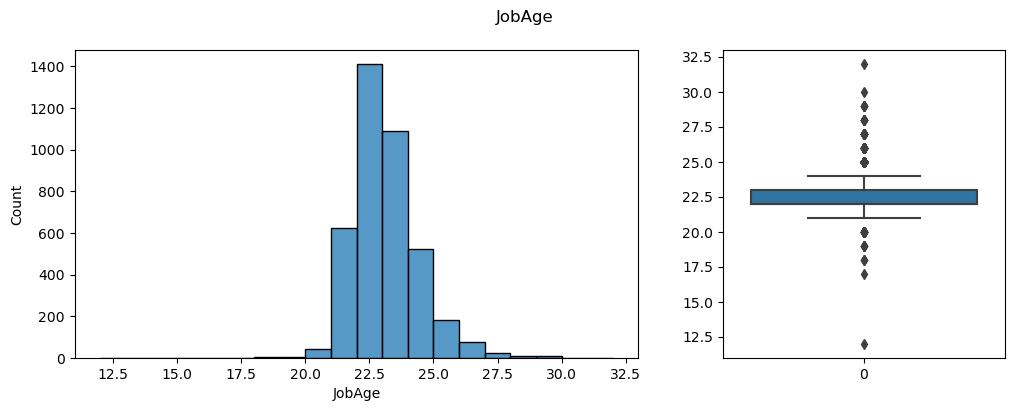

In [54]:
fig, (ax1, ax2) = plt.subplots(1, 2, width_ratios=[2, 1], figsize=(12,4))
sns.histplot(df['JobAge'], ax=ax1, bins=20)
sns.boxplot(df['JobAge'], ax=ax2)
plt.suptitle('JobAge')
plt.show()

In [55]:
df['JobDuration'].describe().astype(int)

count    3942
mean      638
std       420
min        28
25%       334
50%       548
75%       881
max      3651
Name: JobDuration, dtype: int32

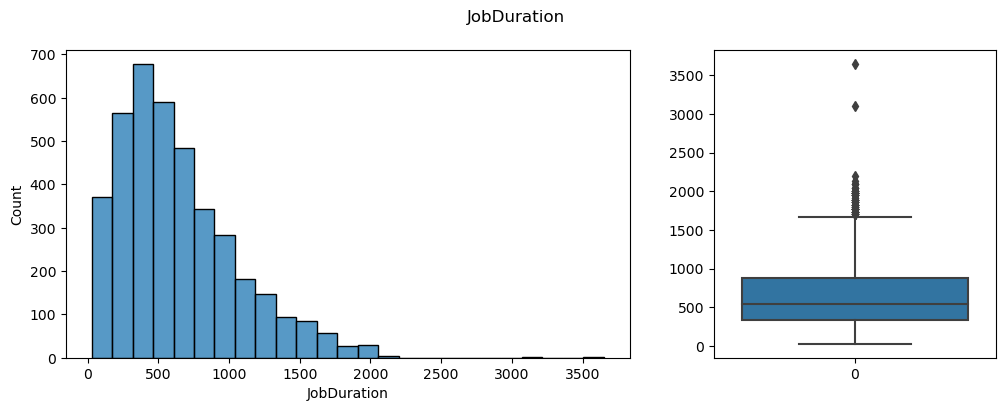

In [56]:
fig, (ax1, ax2) = plt.subplots(1, 2, width_ratios=[2, 1], figsize=(12,4))
sns.histplot(df['JobDuration'], ax=ax1, bins=25)
sns.boxplot(df['JobDuration'], ax=ax2)
plt.suptitle('JobDuration')
plt.show()

* The majority of graduates started working between 2010 and 2014.

* The average age at which graduates began working is 22.6 years.

* The average time spent at the company is 638 days (1.74 years).

## Categorical Feature 

### Gender

In [57]:
cat_df["Gender"].describe()

count     3998
unique       2
top          m
freq      3041
Name: Gender, dtype: object

In [58]:
plt.figure(figsize=(5,5))
sns.countplot(cat_df["Gender"])
plt.show()

ValueError: could not convert string to float: 'f'

* Male category count is around 3000 and Female category count is around 1000.

In [ ]:
cat_df.columns

In [ ]:
df.drop(["DOJ","DOL"],axis=1,inplace=True)

In [ ]:
cat_df.columns

### Designation

In [ ]:
cat_df["Designation"].unique()

In [ ]:
cat_df["Designation"].nunique()

* The column "Designation" contains 419 distinct job titles oﬀered to the graduates. Those titles can be subdivided into a smaller number of job roles.

In [ ]:
def refine_feature(input_val, input_list):
  if type(input_val) == str:
    for item in [i for i in input_list if len(i.split()) > 1]:
      if all([x in input_val for x in item.split()]):
        return item.title()
    for item in [i for i in input_list if len(i.split()) == 1]:
      if item in input_val:
        return item.title()
    if 'engineer' in input_val:
      return 'Hardware Engineer'
    try:
      matched_item = get_close_matches(input_val, input_list)[0]
      return matched_item.title()
    except:
      return 'Other'
  else:
    return np.nan
          

In [ ]:

role_list = ['software engineer', 'system engineer', 'developer', 'analyst', 'test engineer', 'dba', 
            'administrator', 'customer service', 'quality engineer', 'quality', 'automation engineer',
            'network engineer', 'support', 'it engineer', 'manager', 'management', 'programmer', 
            'tester', 'qa engineer', 'design']


In [ ]:

df['Job_Role'] = df['Designation'].apply(lambda x: refine_feature(x, role_list))
df['Job_Role'] = df['Job_Role'].replace({'It Engineer': 'Software Engineer', 'Network Engineer': 'System Engineer', 'Dba': 'System Engineer',
                                   'Support': 'Administrator', 'Customer Service': 'Administrator',
                                   'Tester': 'Test Engineer', 'Qa Engineer': 'Test Engineer', 'Quality': 'Test Engineer', 
                                   'Quality Engineer': 'Test Engineer', 'Automation Engineer': 'Test Engineer', 
                                   'Programmer': 'Developer', 'Management': 'Manager', 'Design': 'Other'})
df['Job_Role'].value_counts(dropna=False)


In [ ]:
sns.countplot(data=df, x='Job_Role')
plt.xticks(rotation=60)
plt.show()

* Graduates are most commonly employed as software engineers and developers. 
* Many graduates have also gone into system and hardware engineering, as well as analyst role.

### Specialization

In [ ]:
cat_df["Specialization"].nunique()

In [ ]:
cat_df["Specialization"].unique()

In [ ]:
specializations = [
    ('electronics|electrical|communication|computer|mechanical|system|instrumentation', 'engineering|eng|technology|communication|instrumentation|automation'),
    ('computer|information', 'science|engineering|technology|application|networking'),
    ('civil|industrial|automobile|aeronautical|polymer|bio|chemical|metallurgical|ceramic', 'engineering|technology')
]

choices = ['computer engineering', 'computer science', 'industrial engineering']

conditions = []

for spec in specializations:
    conditions.append((df['Specialization'].str.contains(spec[0]) & df['Specialization'].str.contains(spec[1])))

df['Specialty'] = np.select(conditions, choices, default='other')

df['Specialty'] = df['Specialty'].str.title()

df['Specialty'].value_counts(dropna=False)


In [ ]:
sns.countplot(data=df, x='Specialty')
plt.xticks(rotation=30)
plt.show()

* above 90% of graduates majored in computer engineering or computer science.

### Degree

In [ ]:
cat_df["Degree"].unique()

In [ ]:
cat_df["Degree"].value_counts()

* we can convert the provided degree into two column "Bachelors" and "Masters".


In [ ]:
df["Degree"]=df["Degree"].replace({'B.Tech/B.E.': 'Bachelor', 'MCA': 'Master', 'M.Tech./M.E.': 'Master', 'M.Sc. (Tech.)': 'Master'})

In [ ]:
df["Degree"].value_counts()

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(data=df,x="Degree")
plt.show()

In [ ]:
display(pd.concat([df['Degree'].value_counts().rename('Count'), 
                   df['Degree'].value_counts(normalize=True).mul(100).round(1).rename('Percent')], axis=1))

* Over 90% of graduates received a bachelor's degree and there are very less students who pursue masters after their graduation

In [ ]:
cat_df.columns

### Job City

In [ ]:
df["JobCity"].unique()

* As we can see the names in the Job City column are too drastic although they are of same State but differently written so we have to make all of them as one .

In [ ]:
import requests
from bs4 import BeautifulSoup

wikiurl="https://en.wikipedia.org/wiki/List_of_cities_in_India_by_population"
response=requests.get(wikiurl)
soup = BeautifulSoup(response.text, 'html.parser')
ind_table = soup.find('table',{'class':"wikitable"})
ind_cities = pd.read_html(str(ind_table))
ind_cities = pd.DataFrame(ind_cities[0])
ind_cities.head()

In [ ]:

from difflib import get_close_matches
import re

def clean_feature(val, val_list):
  if type(val) == str:
    try:
      return get_close_matches(val.title(), val_list)[0]
    except:
      try:
        for word in re.split('\W+', val):
          return get_close_matches(word.title(), val_list)[0]
      except:
        return val.strip().title()
  else:
    return np.nan

city_list = ind_cities['City'].tolist()
df['JobCity_cleaned'] = df['JobCity'].apply(lambda x: clean_feature(x, city_list))
df[['JobCity_cleaned', 'JobCity']].sample(20)

In [ ]:
df['JobState'] = df[['JobCity_cleaned']].merge(ind_cities[['City', 'State or union territory']], how='left', 
                                                   left_on='JobCity_cleaned', right_on='City')['State or union territory']
df['JobState'].isna().sum(), df['JobCity_cleaned'].isna().sum()
 

In [ ]:
cond = [df['JobCity_cleaned'] == 'Greater Noida', 
        df['JobCity_cleaned'] == 'Trivandrum', 
        df['JobCity_cleaned'] == 'Trichy']
states = ['Uttar Pradesh', 'Kerala', 'Tamil Nadu']
df['JobState'] = np.select(cond, states, default=df['JobState'])
df['JobState'].isna().sum(), df['JobCity_cleaned'].isna().sum()
     

In [ ]:
order = df['JobState'].value_counts().index
display(pd.concat([df['JobState'].value_counts().rename('Count'), 
                   df['JobState'].value_counts(normalize=True).mul(100).round(1).rename('Percent')], axis=1))
sns.countplot(data=df, x='JobState', order=order)
plt.xticks(rotation=90)
plt.show()

* Graduates mostly work in Bangalore, Noida, Hyderabad, Pune, and Chennai.

* The most popular states for a job are Karnataka, Maharashtra, Uttar Pradesh, Telangana, and Tamil Nadu.

### 10board  and 12board

In [ ]:
cat_df["10board"].unique()

In [ ]:
cat_df["10board"].nunique()

In [ ]:
cat_df["12board"].unique()

In [ ]:
cat_df["10board"].nunique()

* From the above values we can see that the data is not cleaned the boards must be in a category of CBSE ICSE and State so we have to make them in that category first.


In [ ]:
def board(val):
  if type(val) == str:
    if any(s in val for s in ['central', 'cbse', 'cbsc']):
      return 'CBSE'
    if 'icse' in val:
      return 'ICSE'
    if any(s in val for s in ['ssc', 'sslc', 'matriculation', 'secondary school cerfificate']):
      return 'SSC'
    if 'isc' in val:
      return 'ISC'
    else:
      return 'State Board'
  else:
    return np.nan

df['10board_cleaned'] = df['10board'].apply(lambda x: board(x))
df['12board_cleaned'] = df['12board'].apply(lambda x: board(x))

In [ ]:
df["10board_cleaned"].describe()

In [ ]:
sns.countplot(data=df, x='10board_cleaned')
plt.show()

In [ ]:
df["12board_cleaned"].describe()

In [ ]:
sns.countplot(data=df, x='12board_cleaned')
plt.show()

* The majority of graduates completed their 10th and 12th grades through the State Board or Central Board of Secondary Education.

## Bivariate Analysis 

In [ ]:
df.columns

### Gender v/s Age 

In [ ]:
df.groupby('Gender')['Age'].describe().round(3)

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
sns.barplot(x='Gender', y='Age', data=df, ax=ax1)
sns.boxplot(x='Gender', y='Age', data=df, ax=ax2)
plt.suptitle('Age')
plt.show()

* The Age of both male and female are equally same their mean ages are also same 

### Gender v/s Specialization

* cat vs cat 

In [ ]:
crosstab = pd.crosstab(index=df['Gender'], columns=df['Specialty'])
crosstab_total = pd.crosstab(index=df['Gender'], columns=df['Specialty'], margins=True).loc[['f', 'm'], 'All']
print('Female and male Specialty counts')
crosstab



In [ ]:
props = df.groupby('Gender', as_index=False)['Specialty'].value_counts(normalize=True, sort=False)
sns.barplot(x=props['Specialty'], y=props['proportion'].mul(100), hue=props['Gender'])
plt.ylabel('Percent')
plt.xticks(rotation=45)
plt.show()

* From the above graph the obervation is :
1. The male graduates prefer computer engineering more as their specialization than female
2. The female graduates prefer computer science more as their specialization than male

### Gender v/s 10thGrade and 12thGrade

In [ ]:
print('Overall marks obtained in 10th grade examinations')
display(df.groupby('Gender')['10percentage'].describe().round(1))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
sns.barplot(x='Gender', y='10percentage', data=df, ax=ax1)
sns.boxplot(x='Gender', y='10percentage', data=df, ax=ax2)
plt.suptitle('10percentage')
plt.show()
print('\n', '*'*60, '\n', sep='')
print('Overall marks obtained in 12th grade examinations')
display(df.groupby('Gender')['12percentage'].describe().round(1))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
sns.barplot(x='Gender', y='12percentage', data=df, ax=ax1)
sns.boxplot(x='Gender', y='12percentage', data=df, ax=ax2)
plt.suptitle('12percentage')
plt.show()

* Females have obtained more grades or secured good grades as compared to mens

### Gender v/s collegeGPA



In [ ]:
df.groupby('Gender')['collegeGPA'].describe()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
sns.barplot(x='Gender', y='collegeGPA', data=df, ax=ax1)
sns.boxplot(x='Gender', y='collegeGPA', data=df, ax=ax2)
plt.suptitle('collegeGPA')
plt.show()

* The women have higher college GPAs than men.

### Gender vs Degree


In [ ]:
crosstab = pd.crosstab(index=df['Gender'], columns=df['Degree'])
crosstab_total = pd.crosstab(index=df['Gender'], columns=df['Degree'], margins=True).loc[['f', 'm'], 'All']
print('Female and male Degree counts')
crosstab

In [ ]:
props = df.groupby('Gender', as_index=False)['Degree'].value_counts(normalize=True, sort=False)
sns.barplot(x=props['Degree'], y=props['proportion'].mul(100), hue=props['Gender'])
plt.ylabel('Percent')
plt.show()

* There is no difference between men and women in degrees obtained.

### Gender v/s Job

In [ ]:
crosstab = pd.crosstab(index=df['Gender'], columns=df['Job_Role'])
crosstab_total = pd.crosstab(index=df['Gender'], columns=df['Job_Role'], margins=True).loc[['f', 'm'], 'All']
print('Female and male Job counts')
crosstab

In [ ]:
props = df.groupby('Gender', as_index=False)['Job_Role'].value_counts(normalize=True, sort=False)
props['proportion'] = props['proportion'] * 100
sns.barplot(x='Job_Role', y='proportion', data=props, hue='Gender')
plt.ylabel('Percent')
plt.xticks(rotation=90)
plt.show()

* Female graduates are more likely than male graduates to work as analysts, while men are more likely to work as hardware engineers. In other positions, there is almost no gender difference.

### Gender v/s Salary


In [ ]:
df.groupby('Gender')['Salary'].describe()


In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
sns.barplot(x='Gender', y='Salary', data=df, ax=ax1)
sns.boxplot(x='Gender', y='Salary', data=df, ax=ax2)
plt.suptitle('Salary')
plt.show()

* There is a small difference in the mean salary between women and men, but it is hard to say whether this difference is significant.


### Gender v/s AMCAT scores

In [ ]:
for col in scores:
  print(f'{col} scores')
  display(df.groupby('Gender')[col].describe().round(2))
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
  sns.barplot(x='Gender', y=col, data=df, ax=ax1)
  sns.boxplot(x='Gender', y=col, data=df, ax=ax2)
  plt.suptitle(col)
  plt.show()

*  In the sections of English, Logical, Quantitative, Domain, Computer Programming, Electronics and Semiconductor Engineering, Computer Science, Mechanical Engineering, and Telecommunication Engineering, the differences in scores between genders are minor. In Civil Engineering, women outperform men, whereas men tend to excel in Electrical Engineering.


In [ ]:
for col in standard_scores:
  df_cleaned = df[df[col] >= -3]
  print(f'{col} standardized scores')
  display(df_cleaned.groupby('Gender')[col].describe().round(1))
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
  sns.barplot(x='Gender', y=col, data=df_cleaned, estimator='median', ax=ax1)
  sns.boxplot(x='Gender', y=col, data=df_cleaned, ax=ax2)
  plt.suptitle(col)
  plt.show()

* Women tend to score higher on personality tests such as conscientiousness, agreeableness, and openness to experience.


### CollegeTier v/s CollegeGPA


In [ ]:
df.groupby('CollegeTier')['collegeGPA'].describe()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
sns.barplot(x='CollegeTier', y='collegeGPA', data=df, ax=ax1)
sns.boxplot(x='CollegeTier', y='collegeGPA', data=df, ax=ax2)
plt.suptitle('CollegeGPA')
plt.show()
     


* Graduates from Tier 1 colleges have higher average grades.

### "Salary" vs "Job"    

In [ ]:
order = df.groupby('Job_Role')['Salary'].mean().sort_values().index

df.groupby('Job_Role')['Salary'].describe().round(1).sort_values('mean')

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,8))
sns.barplot(x='Job_Role', y='Salary', data=df, order=order, ax=ax1)
sns.boxplot(x='Job_Role', y='Salary', data=df, order=order, ax=ax2)
ax1.tick_params('x', labelrotation=90)
ax2.tick_params('x', labelrotation=90)
plt.tight_layout()
plt.suptitle('Salary')
plt.show()

* Managers and system, software, and test engineers earn the highest salaries.

### Salary v/s Job Duration


In [ ]:
sns.regplot(x='JobDuration', y='Salary', data=df, scatter_kws={'s':4})
plt.show()

### Salary v/s CollegeTier

In [ ]:
df.groupby('CollegeTier')['Salary'].describe()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
sns.barplot(x='CollegeTier', y='Salary', data=df, ax=ax1)
sns.boxplot(x='CollegeTier', y='Salary', data=df, ax=ax2)
plt.suptitle('Salary')
plt.show()

* The student who have complerted their studies from Tier1 college is more likely to get good salary as coompared to the tIER2 student .

### Salary v/s Age

In [ ]:
sns.regplot(x='Age', y='Salary', data=df, scatter_kws={'s':4})
plt.show()
     

### Salary v/s Specialty

In [ ]:
order = df.groupby('Specialty')['Salary'].mean().sort_values().index

df.groupby('Specialty')['Salary'].describe().round(1).sort_values('mean')

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
sns.barplot(x='Specialty', y='Salary', data=df, order=order, ax=ax1)
sns.boxplot(x='Specialty', y='Salary', data=df, order=order, ax=ax2)
ax1.tick_params('x', labelrotation=90)
ax2.tick_params('x', labelrotation=90)
plt.suptitle('Salary')
plt.show()

* The students who have graduated having specialization in Industrial Engineering earn more as compared to Computer Science Engineer.

### Salary v/s Degree





In [ ]:
df.groupby('Degree')['Salary'].describe()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
sns.barplot(x='Degree', y='Salary', data=df, ax=ax1)
sns.boxplot(x='Degree', y='Salary', data=df, ax=ax2)
plt.suptitle('Salary')
plt.show()

* The ones who have pursued for Bachelor's having more chances to earn better than Master's .

In [ ]:
df.columns

In [ ]:
df.drop(["10board","12board","Specialization","CollegeCityID","CollegeCityTier","CollegeID"],axis=1,inplace=True)

In [ ]:
df.shape

## Research Question

### ***After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.***

### Relation between Salary and Job_Role

In [ ]:
df["Job_Role"].unique()

In [ ]:
df["Designation"].unique()

In [ ]:
filtered_df = df[df['Designation'].isin(['programmer analyst', 'software engineer', 'hardware engineer', 'associate engineer'])]
filtered_df

In [ ]:
average_salary = filtered_df['Salary'].mean()
print(f'The average salary for these roles is: {average_salary}')

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=filtered_df, x="Salary", kde=True)
plt.title('Salary Distribution for Selected Roles')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

In [ ]:
max_salary = filtered_df['Salary'].max()

In [ ]:
if max_salary >= 250000 and max_salary <= 300000:
    print("The claim that fresh graduates can earn up to 2.5-3 lakhs is supported by the data.")
else:
    print("The claim that fresh graduates can earn up to 2.5-3 lakhs is not supported by the data.")

In [ ]:
avg_salary=filtered_df['Salary'].mean()
avg_salary

In [ ]:
if avg_salary >= 250000 and avg_salary <= 300000:
    print("The claim that fresh graduates can earn up to 2.5-3 lakhs is supported by the data.")
else:
    print("The claim that fresh graduates can earn up to 2.5-3 lakhs is not supported by the data.")

***Again we can prove it with the help of Inferential stats that The claim that fresh graduates can earn up to 2.5-3 lakhs is not supported by the data.***

In [ ]:
from scipy.stats import zscore

filtered_df = filtered_df[zscore(filtered_df['Salary']) < 3]

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(filtered_df['Salary'], bins=15)
ax.axvline(250000, ls='--', color='r')
ax.axvline(300000, ls='--', color='r')
ax.text(250000, -5, "2.5 lakhs", fontsize=10, c='red', va='top', ha='center', rotation=90)
ax.text(300000, -5, "3 lakhs", fontsize=10, c='red', va='top', ha='center', rotation=90)
plt.show()

### Is there a relationship between gender and specialization? (i.e. Does the preference of Specialisation depend on the Gender?)

### Gender v/s Specialization

In [ ]:
pd.crosstab(index=df['Gender'], columns=df['Specialty'])

* To ascertain if there's a difference in specialization preferences between men and women, we can employ the chi-square test. This test requires that all observed frequencies are no less than 5. Consequently, we should exclude the "Other" specialty.

* We will conduct the test at a significance level of 0.05.

In [ ]:
from scipy.stats import chi2_contingency

gen_spec_df = df[df['Specialty'] != 'Other']
cont_tab = pd.crosstab(index=gen_spec_df['Gender'], columns=gen_spec_df['Specialty'])
chi2 = chi2_contingency(cont_tab, correction=False)
print("statistic:", chi2.statistic)
print("p-value:", chi2.pvalue)

* The p-value of the statistic is greater than the significance level, indicating that the variables are independent. Hence, there's no association between gender and specialization.

***Is there a relationship between gender and salary?***

In [ ]:
df.groupby('Gender')['Salary'].describe()

* At first glance, it would appear that men and women earn the same amount of money.

* Given that the salary variable is not normally distributed, a non-parametric test should be used to check the hypothesis that men and women earn equal amounts of money.

* The test's significance level will be set at 0.05.



In [ ]:
from scipy.stats import mannwhitneyu

fem_sal = df[df['Gender'] == 'f']['Salary']
mal_sal = df[df['Gender'] == 'm']['Salary']

u_stat, p_value = mannwhitneyu(fem_sal, mal_sal, alternative='less')
print("U-statistic:", u_stat)
print("p-value:", p_value)



* Surprisingly, there is a significant difference between men's and women's incomes. Women earn slightly less than men.

In [ ]:
df.to_csv("AMEO.csv",index=False)

## Conclusion 

1. The percentage achieved in 12th grade has a strong correlation with the percentage in 10th grade, but it doesn't significantly influence the college GPA.<br>

2. Individuals proficient in English tend to perform well in quantitative and logical sections too.

3. More agreeable students are usually more open to experiences.

4. Students who are adept in English, logical reasoning, and quantitative skills are likely to secure higher marks in 10th grade.

5. Students with strong skills in English, quantitative aptitude, and logical reasoning are likely to secure a higher salary package and perform better in their 10th and 12th grade examinations.

6. More agreeable students are often more open to experiences, which can contribute to securing a higher salary package compared to their peers.

7. Female students with advanced education are likely to earn a higher starting salary as freshers compared to their male counterparts.

8. A good personality can compensate for a college GPA when it comes to salary prospects.

9. Despite the higher starting salaries offered in fields like polymer technology and computer networking, these courses attract fewer students.

10. Students who have completed their 10th and 12th grades from CBSE and ICSE boards are likely to have better skills in English, quantitative aptitude, and logical reasoning. This can help them secure a higher salary package post-college compared to students from State Boards.

11. The typical age for completing high school and college is approximately 17.7 and 22.2 years, respectively.

12. Elevated academic scores in school enhance the probability of students gaining admission into premier Tier 1 institutions.

13. In terms of academic performance in the 10th and 12th grades, as well as college GPAs, females generally outperform males.

14. The majority of graduates find employment as software engineers and developers, earning an average salary of 307699.8 INR.

15. There is a slight positive correlation between salary and factors such as age, academic performance, and AMCAT scores. The strongest correlation with salary is the duration of employment at the company.

16. Graduates from Tier 1 colleges tend to earn higher salaries than their counterparts from Tier 2 colleges, with the highest salaries observed in Gujarat, Maharashtra, and Karnataka.

17. Contrary to the claim made in the Indian Times article, most fresh graduates earn an annual salary exceeding 3 lakhs.

18. The data indicates no significant correlation between gender and chosen specialization.

19. This study suggests that men tend to earn slightly more than women.